# Home Assignment 2
 
 by Parag Shendye

Predict Survivors on titanic

In [2]:
import numpy as np 
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [3]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Importing the data here:

In [4]:
test_df = pd.read_csv("C:\\Users\\hp\\Desktop\\edx\\titanic\\test.csv")
train_df = pd.read_csv("C:\\Users\\hp\\Desktop\\edx\\titanic\\train.csv")

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


pre-analysis of data

In [6]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

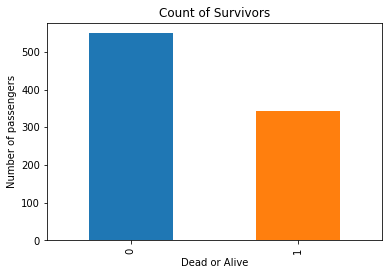

In [7]:
train_df.Survived.value_counts().plot(kind="bar")
plt.title("Count of Survivors")
plt.xlabel("Dead or Alive")
plt.ylabel("Number of passengers")

plt.show()

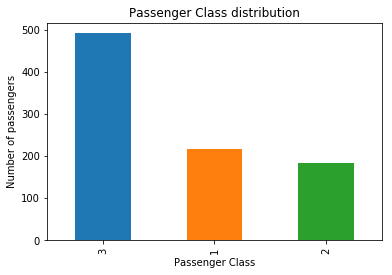

In [8]:
train_df.Pclass.value_counts().plot(kind="bar")
plt.title("Passenger Class distribution")
plt.xlabel("Passenger Class")
plt.ylabel("Number of passengers")
plt.show()

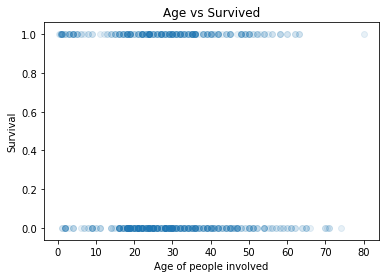

In [9]:
plt.title("Age vs Survived")
plt.scatter(train_df.Age, train_df.Survived, alpha=0.1)
plt.xlabel("Age of people involved")
plt.ylabel("Survival")
plt.show()


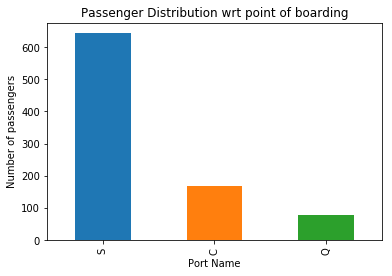

In [10]:
train_df.Embarked.value_counts().plot(kind="bar")
plt.title("Passenger Distribution wrt point of boarding")
plt.xlabel("Port Name")
plt.ylabel("Number of passengers")
plt.show()

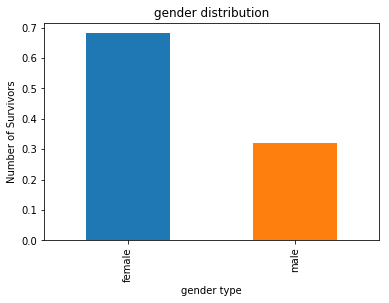

In [11]:
train_df.Sex[train_df.Survived==1].value_counts(normalize=True).plot(kind="bar")
plt.title("gender distribution")
plt.xlabel("gender type")
plt.ylabel("Number of Survivors")
plt.show()

In [12]:
totalmissingval = train_df.isnull().sum().sort_values(ascending=False)
totalmissingval

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

we can see that the number of missing cabin values is 687 so we will ignore this data and drop it from data frame, also we can drop passenger ids from training set

In [13]:
train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [14]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [15]:
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'], dtype=object)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


since algorith can not deal with object values we need to convert them to int or float

filling nan values in embarked coloumn with 'S' because it is most common and there are only two missing values

In [17]:
train_df["Embarked"]=train_df["Embarked"].fillna("S")
test_df["Embarked"]=test_df["Embarked"].fillna("S")

#df.loc[df["Embarked"]=="S","Embarked"]=0
#df.loc[df["Embarked"]=="C","Embarked"]=1
#df.loc[df["Embarked"]=="Q","Embarked"]=2
from sklearn import preprocessing
train_df["Embarked"] = preprocessing.LabelEncoder().fit_transform(train_df["Embarked"])
test_df["Embarked"] = preprocessing.LabelEncoder().fit_transform(test_df["Embarked"])

train_df["Embarked"]

0      2
1      0
2      2
3      2
4      2
5      1
6      2
7      2
8      2
9      0
10     2
11     2
12     2
13     2
14     2
15     2
16     1
17     2
18     2
19     0
20     2
21     2
22     1
23     2
24     2
25     2
26     0
27     2
28     1
29     2
      ..
861    2
862    2
863    2
864    2
865    2
866    0
867    2
868    2
869    2
870    2
871    2
872    2
873    2
874    0
875    0
876    2
877    2
878    2
879    0
880    2
881    2
882    2
883    2
884    2
885    1
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [18]:
train_df["Sex"] = preprocessing.LabelEncoder().fit_transform(train_df["Sex"])
test_df["Sex"] = preprocessing.LabelEncoder().fit_transform(test_df["Sex"])
train_df["Sex"]

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [19]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [20]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [21]:
train_df=train_df.drop(['Name'],axis=1)
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)


Now we will fill the non available values in age coloumn taking the median values.

In [22]:
from numpy import median

train_df["Fare"]=train_df["Fare"].fillna(train_df["Fare"].dropna().median())
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].dropna().median())
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].dropna().median())
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].dropna().median())


In [23]:
train_df["Age"].isnull().sum()

0

In [24]:
train_df["Embarked"].isnull().sum()

0

Using machine learning algorithms

In [25]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [41]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,1
5,0,3,1,28.0,0,0,8.4583,1,0,1
6,0,1,1,54.0,0,0,51.8625,2,0,1
7,0,3,1,2.0,3,1,21.0750,2,4,0
8,1,3,0,27.0,0,2,11.1333,2,2,0
9,1,2,0,14.0,1,0,30.0708,0,1,0


Checking accuracy with logistic regression

In [26]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

80.58 %


In [27]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")


84.51 %


In [28]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

78.9 %


In [29]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

77.1 %


In [60]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_pred) * 100, 2)
print(round(acc_decision_tree,2,), "%")

ValueError: Found input variables with inconsistent numbers of samples: [418, 891]

In [31]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.98 %


In [32]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
               acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
97.98,Random Forest
97.98,Decision Tree
84.51,KNN
80.58,Logistic Regression
78.90,Naive Bayes
77.10,Support Vector Machines


Applying kfold cross validation to random forest classifier

In [33]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [34]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.72222222  0.8         0.75280899  0.84269663  0.88764045  0.84269663
  0.83146067  0.75280899  0.80898876  0.82954545]
Mean: 0.807086880036
Standard Deviation: 0.0482405281526


Lastly checking the importance of the features

In [35]:
features=list(train_df.columns)

In [36]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)

In [37]:
importances


,feature,importance
5,Fare,0.2657
1,Sex,0.2644
2,Age,0.2480
0,Pclass,0.0818
7,relatives,0.0459
6,Embarked,0.0349
3,SibSp,0.0260
4,Parch,0.0201
8,not_alone,0.0134


# Task 2 - personal data of candidates from one particular state in germany

In [57]:
import requests, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
read = requests.get(url='https://www.abgeordnetenwatch.de/api/parliament/Berlin/candidates.json')
read_data = read.json()

In [59]:
print(read_data)

{'meta': {'contributer': [], 'subsets': ['https://www.abgeordnetenwatch.de/api/parliament/Berlin/candidates.json?subsets=votes', 'https://www.abgeordnetenwatch.de/api/parliament/Berlin/candidates.json?subsets=dialogues', 'https://www.abgeordnetenwatch.de/api/parliament/Berlin/candidates.json?subsets=sidejobs'], 'license': {'name': 'Open Database License (ODbL) v1.0', 'url': 'https://opendatacommons.org/licenses/odbl/1.0/'}}, 'profiles': [{'roles': [], 'constituency': {'number': None, 'name': 'Charlottenburg-Wilmersdorf WK 6', 'result': None, 'won': None, 'uuid': '8e078009-1b75-4675-8a4c-696b4bda7963'}, 'party': 'CDU', 'meta': {'username': 'stefan-evers', 'questions': 15, 'standard_replies': 0, 'status': '1', 'answers': 12, 'url': 'https://www.abgeordnetenwatch.de/profile/stefan-evers/archive/140710', 'edited': '2016-07-21 00:14', 'uuid': 'a6b90850-b231-4bff-9913-ac33e6489325'}, 'list': [], 'committees': [{'name': 'Ausschuss für Stadtentwicklung und Wohnen', 'role': 'Spokesman', 'uuid':

In [60]:
print(read_data["profiles"])

[{'roles': [], 'constituency': {'number': None, 'name': 'Charlottenburg-Wilmersdorf WK 6', 'result': None, 'won': None, 'uuid': '8e078009-1b75-4675-8a4c-696b4bda7963'}, 'party': 'CDU', 'meta': {'username': 'stefan-evers', 'questions': 15, 'standard_replies': 0, 'status': '1', 'answers': 12, 'url': 'https://www.abgeordnetenwatch.de/profile/stefan-evers/archive/140710', 'edited': '2016-07-21 00:14', 'uuid': 'a6b90850-b231-4bff-9913-ac33e6489325'}, 'list': [], 'committees': [{'name': 'Ausschuss für Stadtentwicklung und Wohnen', 'role': 'Spokesman', 'uuid': '11b882d6-c868-4db6-8d92-114f24b350f8'}, {'name': 'Ausschuss für Europa- und Bundesangelegenheiten, Medien', 'role': 'Member', 'uuid': '17c8dc5d-80f4-4dfa-aa2a-609deb5d35c3'}], 'parliament': {'name': 'Berlin', 'uuid': '48ed5f9d-884f-4f0b-91c3-714990544800'}, 'personal': {'location': {'city': '', 'state': '', 'country': 'DE', 'postal_code': ''}, 'birthyear': '1979', 'twitter': None, 'degree': None, 'first_name': 'Stefan', 'last_name': 'E

In [61]:
len(read_data["profiles"])

654

In [67]:
candidate_info= []

for i in range(len(json_data['profiles'])):
    infodict = {}
    infodict['gender'] = 1 if read_data['profiles'][i]['personal']['gender'] == 'male' else 0
    infodict['profession'] = json_data['profiles'][i]['personal']['profession']
    infodict['age'] = 2018 - int(json_data['profiles'][i]['personal']['birthyear'] or 2019) 
    infodict['last_name'] = json_data['profiles'][i]['personal']['last_name']
    infodict['first_name'] = json_data['profiles'][i]['personal']['first_name']
    infodict['education'] = json_data['profiles'][i]['personal']['education']
    candidate_info.append(infodict)
    
df = pd.DataFrame(candidate_info)

In [68]:
print(df)

     age                                          education       first_name  \
0     39                   Studium der Rechtswissenschaften           Stefan   
1     -1                                  Diplom Politologe           Dennis   
2     -1                                               None          Carsten   
3     -1                                               None        Christian   
4     -1                                               None          Herbert   
5     32                                       Jura Studium             Marc   
6     40                   Studium der Sozialwissenschaften             Sven   
7     -1                                               None              Ina   
8     38                                         Volljurist          Torsten   
9     36                                  Dipl. Volkswirtin            Derya   
10    35                                      Offizier a.D.         Thorsten   
11    -1           ausgebildete Tischler

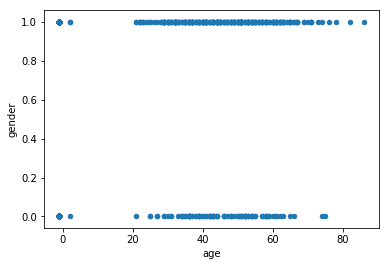

In [69]:
df.plot.scatter("age", "gender")


Task 3: apriori algorithm